In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Build the pure visual model"""
from mvcl.percept.metanet import MetaNet
from mvcl.model import MetaVisualLearner, config
from mvcl.custom import ObjectAffinityFeatures
from datasets.sprites_base_dataset import SpritesBaseDataset
from rinarak.utils.tensor import gather_loss

#affinity = ObjectAffinityFeatures(3, 100)
"""make the dataset"""
W, H = (64,64)
config.resolution = (W,H)
metanet = MetaVisualLearner(None, config)

metanet.add_affinities(["red", "blue", "green"])

[Taichi] version 1.7.0, llvm 15.0.7, commit 7b58b0ff, osx, python 3.9.13


[I 04/13/24 05:58:05.718 10198916] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


red
green
blue
not-any-color
square
circle
diamond
not-any-shape


/Users/melkor/Documents/GitHub/MetaVisualConceptLearner/datasets/sprites_base_dataset.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data["img"] = self.transform(torch.tensor(normal_img(img)))


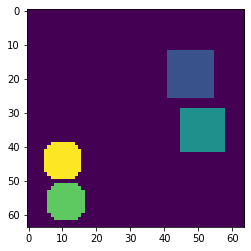

red


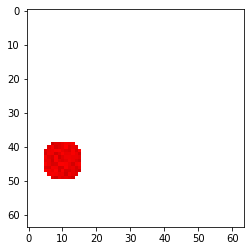

green


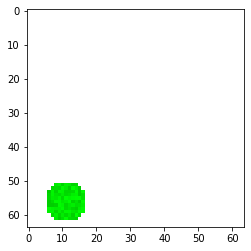

blue


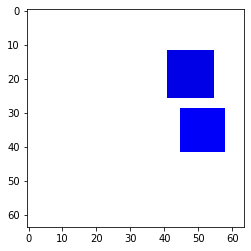

not-any-color


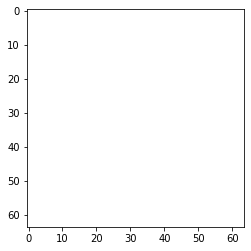

square


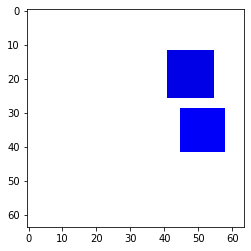

circle


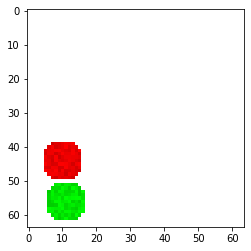

diamond


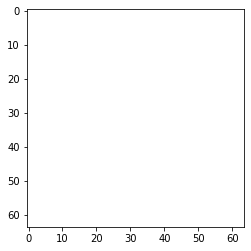

not-any-shape


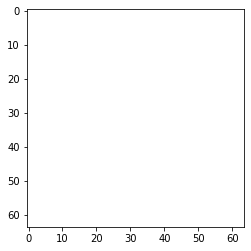

torch.Size([1, 3, 4096, 58])
torch.Size([1, 4096, 58, 64]) torch.Size([1, 3, 64])
attn torch.Size([1, 3, 4096, 58]) tensor(0.4256, grad_fn=<MaxBackward1>) tensor(0.2526, grad_fn=<MinBackward1>)
torch.Size([1, 4096, 58]) tensor(13.8023, grad_fn=<MaxBackward1>) tensor(-6.6436, grad_fn=<MinBackward1>)
torch.Size([1, 4096, 58])
{'adapter_loss': tensor(0.0069, grad_fn=<MeanBackward0>)}
done


In [3]:


dataset = SpritesBaseDataset(resolution = (W,H))
loader = torch.utils.data.DataLoader(dataset, batch_size = 1, shuffle = True)
for sample in loader: break


def gather_annotated_masks(part_masks, scene_dict, device = "cuda:0" if torch.cuda.is_available() else "cpu"):
    B, W, H = part_masks.shape
    K = len(scene_dict)
    masks = torch.zeros([B, W, H, K], device = device)
    masks_dict = {}

    for key in scene_dict:
        masks_dict[key] = torch.zeros([B,W,H], device = device)
        part_ids_binds = scene_dict[key]
        print(key)
        for b, part_ids in enumerate(part_ids_binds):
            ids = []
            for i in part_ids[1:-1].split(","):
                if len(i) > 0: ids.append(int(i))
            for id in ids:
                #print(masks_dict[key][b].shape)
                #print(part_masks[b,:,:].shape)
                masks_dict[key][b][part_masks[b,:,:]==id] = 1
    return masks_dict



# classifer as the edges: 

ims = sample["img"]
targets = sample["masks"]
annotated_masks = gather_annotated_masks(targets, sample["scene"])

plt.imshow(targets[0])
plt.show()

for key in annotated_masks:
    plt.figure(key)
    print(key)
    plt.imshow((annotated_masks[key].unsqueeze(-1) * ims.permute(0,2,3,1))[0])
    plt.show()
auguments = {"annotated_masks": annotated_masks} 

#metanet.eval()
metanet.freeze_components()
outputs=metanet.calculate_object_affinity(
    ims,
    targets,
    working_resolution=(W,H),verbose=True, augument = auguments)
print(outputs["affinity"].shape)
loss = gather_loss(outputs["loss"])
print(loss)
print("done")

In [4]:
"""Write the code for the adaptive object affinity calculator"""
def calculate_object_affinity(self):
    """step 1: calculate the attention based on the component affinity key"""
    
    """step 2: calculate something real"""
    return 